<a href="https://colab.research.google.com/github/Jessicam06/Curso_Lenguajes_de_programacion/blob/main/Ex%C3%A1men_institucional_An%C3%A1lisis_financiero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARGAR LOS DATOS


In [12]:
import pandas as pd

# Leer el archivo CSV desde la carpeta de Colab
df = pd.read_csv("/content/Flujos_de_caja.csv", sep=';', encoding='latin1')

# Renombrar columnas
df.columns = ['Proyecto', 'Inversion_Inicial'] + [f'Año_{i}' for i in range(1, 11)]

# Verificar primeras filas
df.head()


,Proyecto,Inversion_Inicial,Año_1,Año_2,Año_3,Año_4,Año_5,Año_6,Año_7,Año_8,Año_9,Año_10
0,Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746
1,Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686
2,O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842
3,Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958
4,Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808


REVISIÓN DE DATOS

In [17]:
# Ver cuántas filas, columnas y tipos de datos hay
print("Información general del DataFrame:")
print(df.info())

# Revisar si hay datos vacíos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Ver estadísticas generales de los datos numéricos
print("\nResumen estadístico:")
print(df.describe())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Proyecto           1000 non-null   object
 1   Inversion_Inicial  1000 non-null   int64 
 2   Año_1              1000 non-null   int64 
 3   Año_2              1000 non-null   int64 
 4   Año_3              1000 non-null   int64 
 5   Año_4              1000 non-null   int64 
 6   Año_5              1000 non-null   int64 
 7   Año_6              1000 non-null   int64 
 8   Año_7              1000 non-null   int64 
 9   Año_8              1000 non-null   int64 
 10  Año_9              1000 non-null   int64 
 11  Año_10             1000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 93.9+ KB
None

Valores nulos por columna:
Proyecto             0
Inversion_Inicial    0
Año_1                0
Año_2                0
Año_3                0
A

CÁCULO DE LA VPN

In [19]:
# Función para calcular el VPN de un proyecto
def calcular_vpn(flujos, tasa_descuento):
    vpn = 0
    for t in range(len(flujos)):
        vpn += flujos[t] / ((1 + tasa_descuento) ** t)
    return vpn

# Definir la tasa de descuento (12%)
tasa = 0.12

# Calcular el VPN para cada proyecto y guardarlo en una nueva columna
df['VPN'] = df.apply(lambda fila: calcular_vpn(
    [fila['Inversion_Inicial']] + [fila[f'Año_{i}'] for i in range(1, 11)],
    tasa
), axis=1)

# Verificar resultados
df[['Proyecto', 'VPN']].head()


,Proyecto,VPN
0,Winston Smith,-9.247149e+06
1,Julia,-3.577146e+06
2,O'Brien,1.252428e+07
3,Big Brother,3.915842e+07
4,Don Quijote,5.473385e+07


CÁCULO DE LA TIR

In [21]:
# Instalar la librería
!pip install numpy-financial

# Importar la librería
import numpy_financial as npf

# Calcular la TIR y guardarla en una nueva columna
df['TIR'] = df.apply(lambda fila: npf.irr(
    [fila['Inversion_Inicial']] + [fila[f'Año_{i}'] for i in range(1, 11)]
), axis=1)

# Ver los resultados
df[['Proyecto', 'VPN', 'TIR']].head()

,Proyecto,VPN,TIR
0,Winston Smith,-9.247149e+06,0.096411
1,Julia,-3.577146e+06,0.109983
2,O'Brien,1.252428e+07,0.159578
3,Big Brother,3.915842e+07,0.292613
4,Don Quijote,5.473385e+07,0.418964


VER RESULTADOS CON GRÁFICOS

<ipython-input-26-490b59c5986c>:11: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-490b59c5986c>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


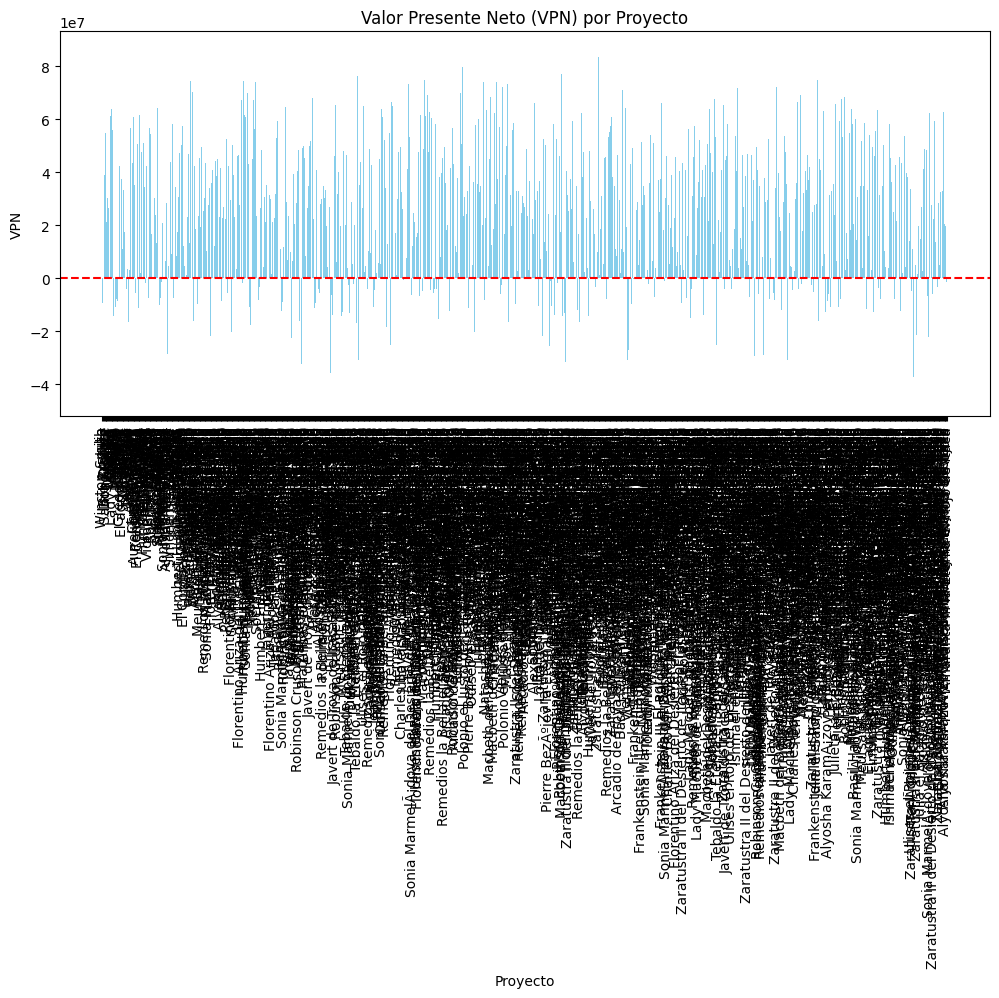

<ipython-input-26-490b59c5986c>:23: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-490b59c5986c>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


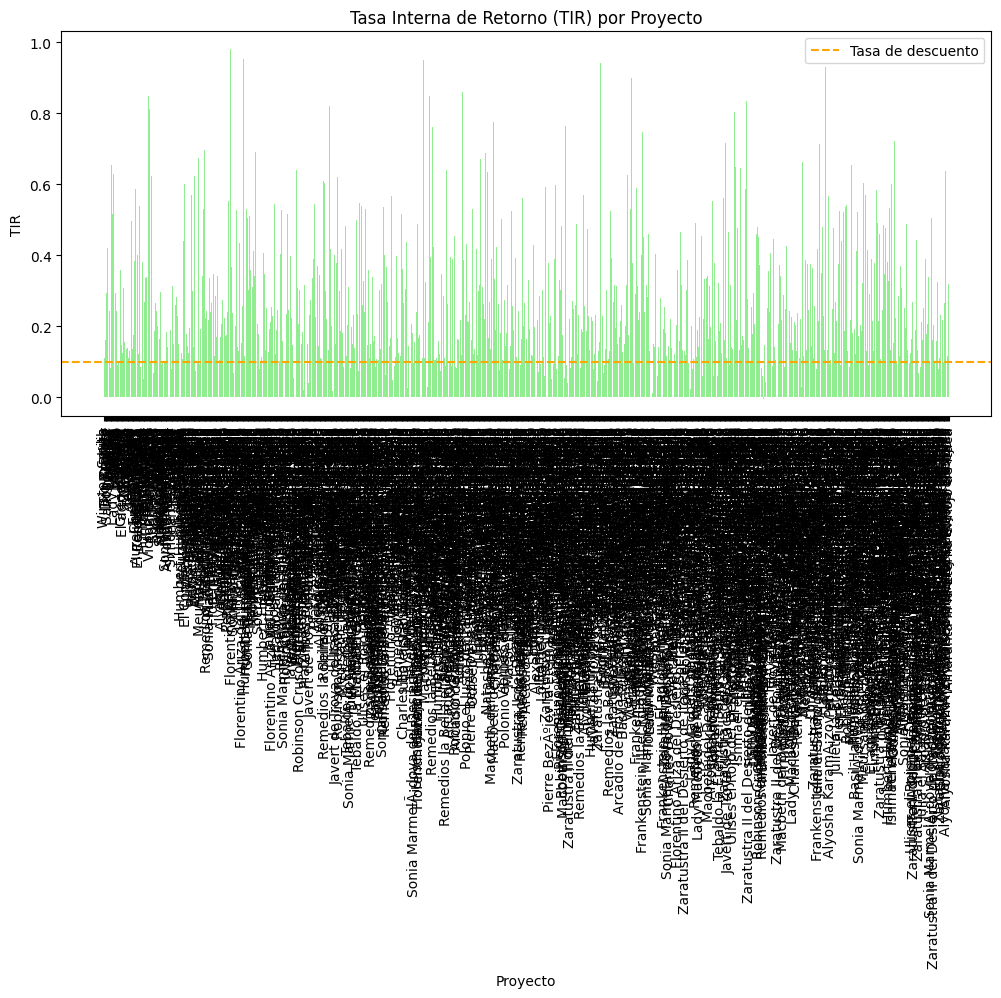

In [26]:
import matplotlib.pyplot as plt

# Gráfico de barras VPN
plt.figure(figsize=(12, 5))
plt.bar(df['Proyecto'], df['VPN'], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Valor Presente Neto (VPN) por Proyecto')
plt.xlabel('Proyecto')
plt.ylabel('VPN')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico de barras TIR
plt.figure(figsize=(12, 5))
plt.bar(df['Proyecto'], df['TIR'], color='lightgreen')
plt.axhline(0.10, color='orange', linestyle='--', label='Tasa de descuento')
plt.title('Tasa Interna de Retorno (TIR) por Proyecto')
plt.xlabel('Proyecto')
plt.ylabel('TIR')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



PROYECTO MÁS RENTABLE

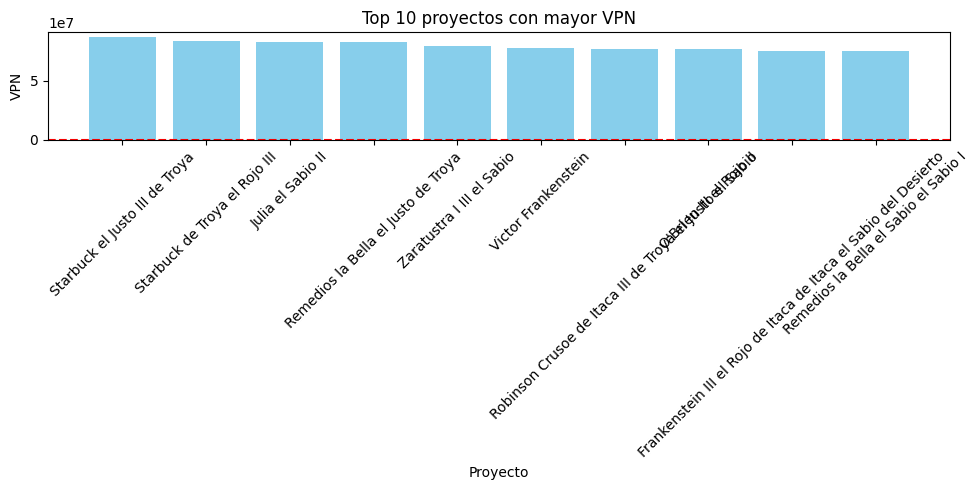

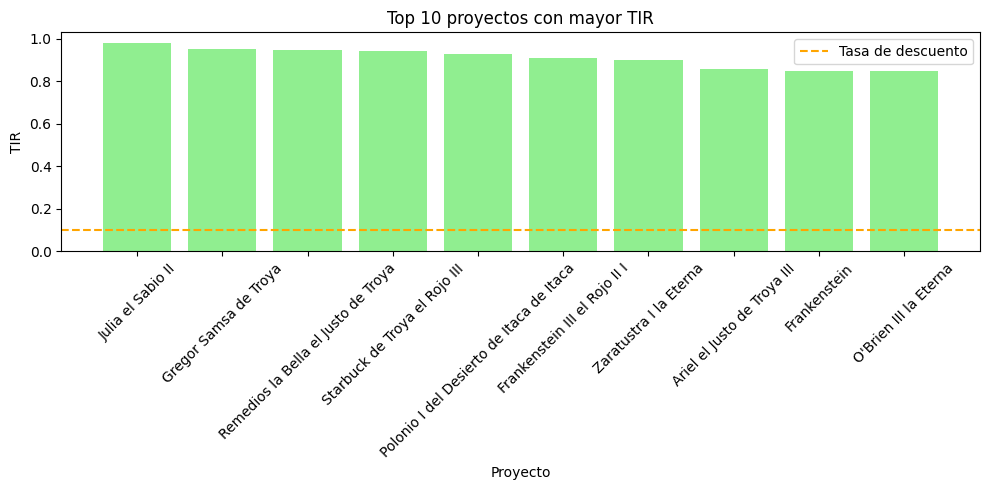

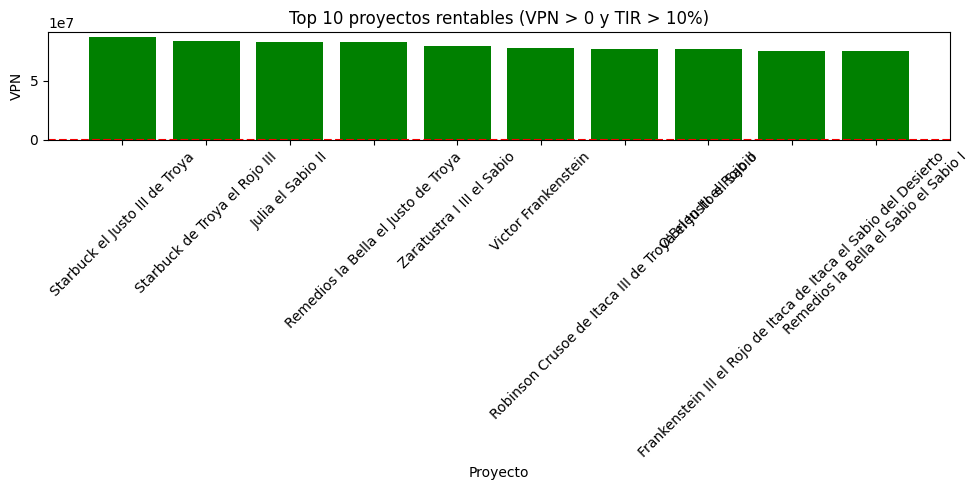

In [27]:
import matplotlib.pyplot as plt

# Top 10 proyectos con mayor VPN
top_vpn = df.nlargest(10, 'VPN')

plt.figure(figsize=(10, 5))
plt.bar(top_vpn['Proyecto'], top_vpn['VPN'], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Top 10 proyectos con mayor VPN')
plt.xlabel('Proyecto')
plt.ylabel('VPN')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 proyectos con mayor TIR
top_tir = df.nlargest(10, 'TIR')

plt.figure(figsize=(10, 5))
plt.bar(top_tir['Proyecto'], top_tir['TIR'], color='lightgreen')
plt.axhline(0.10, color='orange', linestyle='--', label='Tasa de descuento')
plt.title('Top 10 proyectos con mayor TIR')
plt.xlabel('Proyecto')
plt.ylabel('TIR')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filtrar los proyectos que sí son rentables
proyectos_rentables = df[(df['VPN'] > 0) & (df['TIR'] > 0.10)]

# De esos, mostrar solo los 10 con mayor VPN
proyectos_rentables_top = proyectos_rentables.nlargest(10, 'VPN')

plt.figure(figsize=(10, 5))
plt.bar(proyectos_rentables_top['Proyecto'], proyectos_rentables_top['VPN'], color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Top 10 proyectos rentables (VPN > 0 y TIR > 10%)')
plt.xlabel('Proyecto')
plt.ylabel('VPN')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MENÚ INTERACTIVO

In [32]:
# Menú interactivo para seleccionar opciones

# Importar librerías necesarias
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# ======== FUNCIONES ========

def ver_datos(b):
    clear_output()
    mostrar_menu()
    display(df.head())

def ver_indicadores(b):
    clear_output()
    mostrar_menu()
    display(df[['Capitalizador', 'VPN', 'TIR']])

def ver_graficos(b):
    clear_output()
    mostrar_menu()

    # Filtro de proyectos rentables
    proyectos_rentables = df[(df['VPN'] > 0) & (df['TIR'] > 0.12)]

    # Seleccionar solo los 10 con mayor VPN
    proyectos_rentables_top = proyectos_rentables.nlargest(10, 'VPN')

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.bar(proyectos_rentables_top['Capitalizador'], proyectos_rentables_top['VPN'], color='green')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('📈 Top 10 capitalizadores rentables (VPN > 0 y TIR > 12%)', fontsize=14)
    plt.xlabel('Capitalizador')
    plt.ylabel('VPN')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def salir(b):
    clear_output()

def mostrar_menu():
    display(menu_box)

# ======== WIDGETS ========

# Crear botones con estilos mejorados
btn_datos = widgets.Button(description='📊 Ver Datos', button_style='primary')
btn_indicadores = widgets.Button(description='📈 Ver Indicadores', button_style='info')
btn_graficos = widgets.Button(description='📉 Ver Gráficos', button_style='success')
btn_salir = widgets.Button(description='❌ Salir', button_style='danger')

# Asignar acciones a los botones
btn_datos.on_click(ver_datos)
btn_indicadores.on_click(ver_indicadores)
btn_graficos.on_click(ver_graficos)
btn_salir.on_click(salir)

# Agrupar botones en una línea horizontal
botones = widgets.HBox([btn_datos, btn_indicadores, btn_graficos, btn_salir])

# Caja principal con título
menu_box = widgets.VBox([
    widgets.HTML("📌 Selecciona una opción:"),
    botones
])

# Mostrar el menú
mostrar_menu()

SUSTENTACIÓN

En este análisis financiero se evaluaron múltiples proyectos de inversión utilizando dos indicadores: el Valor Presente Neto (VPN) y la Tasa Interna de Retorno (TIR). Estos indicadores permiten determinar la rentabilidad de cada proyecto y tomar decisiones informadas.

Se realizó primero carga y limpieza de datos: Los datos fueron cargados desde un archivo CSV que contiene los flujos de caja para varios años. Se eliminaron valores nulos y se convirtieron los datos a valores numéricos.

Luego se calculó la VPN, este se calculó utilizando una tasa de descuento del 12%. Un VPN positivo indica que el proyecto es rentable.

Por último se calculó la TIR, esta se determinó como el valor de la tasa de descuento que iguala a cero el VPN. Un proyecto es aceptable si su TIR es mayor que la tasa de descuento.

Se ejecuta visualización: Se utilizó Matplotlib para graficar los resultados, permitiendo una interpretación clara de la rentabilidad de cada proyecto.

Menú Interactivo: Se implementó un menú interactivo que facilita la visualización y el análisis de los datos.